NAME: DEV AGARWAL REG NO: 220968019 SECTION: A ROLL NO: 06 BATCH: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math

In [2]:
data = pd.read_csv('breast_cancer.csv')
df = pd.DataFrame(data)
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
df.loc[-1] = [1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1]  # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 

In [4]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1000025.0,5.0,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,2.1
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0,2.0


In [5]:
df.rename(columns = {'1000025':'Id', '5':'Clump_thickness', 
                              '1':'Uniformity_Cell_Size','1.1':'Uniformity_Cell_Shape',
                             '1.2':'Marginal_Adhesion',
                             '2':'Single_Epithelial_Cell_Size',
                             '1.3':'Bare_Nuclei',
                             '3':'Bland_Chromatin',
                             '1.4':'Normal_Nucleoli',
                             '1.5':'Mitoses',
                             '2.1':'Class'}, inplace = True) 

In [6]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,2.1
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0,2.0


In [7]:
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
df.shape

(699, 11)

In [9]:
df.isnull().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
df.dtypes

Id                             float64
Clump_thickness                float64
Uniformity_Cell_Size           float64
Uniformity_Cell_Shape          float64
Marginal_Adhesion              float64
Single_Epithelial_Cell_Size    float64
Bare_Nuclei                     object
Bland_Chromatin                float64
Normal_Nucleoli                float64
Mitoses                        float64
Class                          float64
dtype: object

In [11]:
df = df[df['Bare_Nuclei'] != '?']

In [12]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           683 non-null    float64
 1   Clump_thickness              683 non-null    float64
 2   Uniformity_Cell_Size         683 non-null    float64
 3   Uniformity_Cell_Shape        683 non-null    float64
 4   Marginal_Adhesion            683 non-null    float64
 5   Single_Epithelial_Cell_Size  683 non-null    float64
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              683 non-null    float64
 8   Normal_Nucleoli              683 non-null    float64
 9   Mitoses                      683 non-null    float64
 10  Class                        683 non-null    float64
dtypes: float64(11)
memory usage: 64.0 KB


In [14]:
df = df[df['Class'] != 2.1]

In [15]:
df.describe().round(2)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,682.00,682.00,682.00,682.00,682.00,682.00,682.00,682.00,682.00,682.00,682.00
mean,1076832.68,4.44,3.15,3.22,2.83,3.24,3.55,3.45,2.87,1.60,2.70
std,621092.60,2.82,3.07,2.99,2.87,2.22,3.65,2.45,3.05,1.73,0.95
min,63375.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,877454.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,1171820.00,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,1238741.00,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,13454352.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


In [16]:
df = df.drop_duplicates()

In [17]:
df.corr().round(2)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,1.00,-0.06,-0.04,-0.04,-0.07,-0.05,-0.10,-0.06,-0.05,-0.04,-0.08
Clump_thickness,-0.06,1.00,0.64,0.65,0.49,0.52,0.59,0.56,0.53,0.35,0.72
Uniformity_Cell_Size,-0.04,0.64,1.00,0.91,0.71,0.75,0.69,0.76,0.72,0.46,0.82
Uniformity_Cell_Shape,-0.04,0.65,0.91,1.00,0.69,0.72,0.71,0.74,0.72,0.44,0.82
Marginal_Adhesion,-0.07,0.49,0.71,0.69,1.00,0.60,0.68,0.67,0.60,0.42,0.71
Single_Epithelial_Cell_Size,-0.05,0.52,0.75,0.72,0.60,1.00,0.58,0.62,0.63,0.48,0.69
Bare_Nuclei,-0.10,0.59,0.69,0.71,0.68,0.58,1.00,0.68,0.59,0.34,0.82
Bland_Chromatin,-0.06,0.56,0.76,0.74,0.67,0.62,0.68,1.00,0.67,0.35,0.76
Normal_Nucleoli,-0.05,0.53,0.72,0.72,0.60,0.63,0.59,0.67,1.00,0.43,0.72
Mitoses,-0.04,0.35,0.46,0.44,0.42,0.48,0.34,0.35,0.43,1.00,0.42


<Axes: >

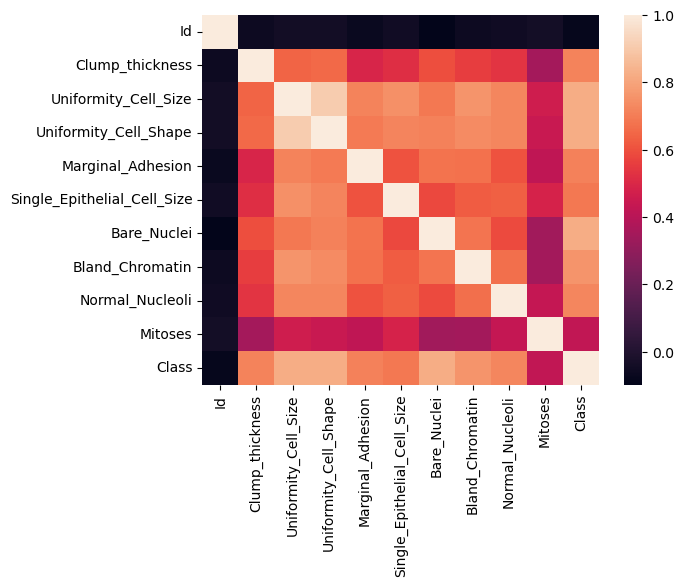

In [18]:
sns.heatmap(data = df.corr())

In [19]:
X = df[['Clump_thickness','Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]
y = df[['Class']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
model = scaler.fit(X_train)
X_train_scaled = model.transform(X_train)

In [24]:
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9655172413793104


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
print(confusion_matrix(y_test, y_pred))

[[135   3]
 [  4  61]]


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         2.0       0.97      0.98      0.97       138
         4.0       0.95      0.94      0.95        65

    accuracy                           0.97       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.97      0.97      0.97       203



In [30]:
score =[]
matrix = []
report = []
for x in range(1,11,2):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score.append(accuracy_score(y_test,y_pred))
    report.append(classification_report(y_test,y_pred))
    matrix.append(confusion_matrix(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [31]:
print(score)

[0.9556650246305419, 0.9655172413793104, 0.9802955665024631, 0.9704433497536946, 0.9704433497536946]


In [32]:
print(matrix)

[array([[134,   4],
       [  5,  60]], dtype=int64), array([[135,   3],
       [  4,  61]], dtype=int64), array([[136,   2],
       [  2,  63]], dtype=int64), array([[135,   3],
       [  3,  62]], dtype=int64), array([[136,   2],
       [  4,  61]], dtype=int64)]


In [33]:
print(report)

['              precision    recall  f1-score   support\n\n         2.0       0.96      0.97      0.97       138\n         4.0       0.94      0.92      0.93        65\n\n    accuracy                           0.96       203\n   macro avg       0.95      0.95      0.95       203\nweighted avg       0.96      0.96      0.96       203\n', '              precision    recall  f1-score   support\n\n         2.0       0.97      0.98      0.97       138\n         4.0       0.95      0.94      0.95        65\n\n    accuracy                           0.97       203\n   macro avg       0.96      0.96      0.96       203\nweighted avg       0.97      0.97      0.97       203\n', '              precision    recall  f1-score   support\n\n         2.0       0.99      0.99      0.99       138\n         4.0       0.97      0.97      0.97        65\n\n    accuracy                           0.98       203\n   macro avg       0.98      0.98      0.98       203\nweighted avg       0.98      0.98      0.98

<Axes: >

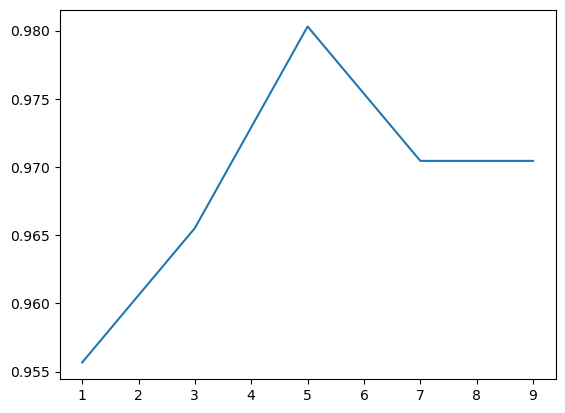

In [34]:
temp = [1,3,5,7,9]
sns.lineplot(x = temp, y = score)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9802955665024631


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
print(confusion_matrix(y_test,y_pred))

[[136   2]
 [  2  63]]


In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

In [38]:
roc_auc_score(y_pred, y_test)

0.9773690078037904

In [39]:
y_test

,Class
336,4.0
33,2.0
675,2.0
558,2.0
116,2.0
...,...
575,2.0
424,2.0
450,2.0
359,4.0


In [41]:
from sklearn.model_selection import KFold, cross_val_score

In [42]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(knn, X, y, cv = k_folds)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [43]:
scores

array([0.93333333, 0.97037037, 0.96296296, 0.97777778, 0.99253731])

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

array([[-1.06999304e+00,  8.18702471e-02],
       [ 2.15592556e+00, -7.05800731e-01],
       [-2.23338760e+00,  2.52356005e-01],
       [-2.23338760e+00,  2.52356005e-01],
       [ 3.82555698e+00, -1.22049641e+00],
       [-1.22666113e+00, -1.82943375e-01],
       [-2.11639907e+00, -1.50057144e-02],
       [-2.00933038e+00, -5.19104920e-02],
       [-1.98512684e+00,  2.23715765e-01],
       [-2.23338760e+00,  2.52356005e-01],
       [ 6.64317041e-01, -4.03580221e-01],
       [ 2.45522048e+00,  2.61005429e-01],
       [-9.32467975e-01,  6.96586634e-03],
       [-2.23338760e+00,  2.52356005e-01],
       [-1.63931922e+00, -7.54729830e-02],
       [ 4.78625582e+00, -1.89226326e+00],
       [-1.75331559e+00,  3.83259472e-02],
       [-1.88281907e+00,  6.99891224e-02],
       [ 3.95810202e+00,  3.41723134e-01],
       [-2.25283023e+00,  9.35516134e-02],
       [ 2.76361463e+00,  2.96534324e-01],
       [-1.98988775e+00,  1.06893900e-01],
       [-1.63931922e+00, -7.54729830e-02],
       [ 1.

In [47]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca, y_train)
y_pred1 = knn.predict(X_test_pca)
print(accuracy_score(y_test,y_pred1))

0.9704433497536946


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
